In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import numpy as np

In [2]:
import os
import pandas as pd

# Path to the directory containing your CSV files

directory_path = '/home/danish/Datasets/EVSE-B'
# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path).dropna()
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
data = combined_df # .sample(frac=0.5, random_state=42)
data.shape
# Optionally, you can save the combined DataFrame to a new CSV file
# combined_df.to_csv('/path/to/combined_data.csv', index=False)

(115298, 10)

In [3]:
data.columns.to_list()

['time',
 'shunt_voltage',
 'bus_voltage_V',
 'current_mA',
 'power_mW',
 'State',
 'Attack',
 'Attack-Group',
 'Label',
 'interface']

In [4]:
data['Label'].value_counts()

Label
attack    100935
benign     14363
Name: count, dtype: int64

In [5]:
# # List of bad or constant columns 
# columns_to_drop = ['R3-PA:Z', 'R1-PA:Z', 'R2-PA:Z', 'R4-PA:Z', 'snort_log1', 'snort_log2', 'control_panel_log2', 'control_panel_log1']

# # Remove specified columns
# data = data.drop(columns=columns_to_drop)

In [6]:

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('/home/danish/Downloads/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks/data1.csv')
data.replace([np.inf, -np.inf], 1e15, inplace=True)
# data

# Extract the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols]
data

,time,shunt_voltage,bus_voltage_V,current_mA,power_mW,State,Attack,Attack-Group,Label,interface
0,12/25/2023 22:35,978,5.165,1027,5300,idle,syn-flood,DoS,attack,ocpp
1,12/25/2023 22:35,872,5.161,1009,4980,idle,syn-flood,DoS,attack,ocpp
2,12/25/2023 22:35,1017,5.165,1029,5300,idle,syn-flood,DoS,attack,ocpp
3,12/25/2023 22:35,930,5.161,1005,5180,idle,syn-flood,DoS,attack,ocpp
4,12/25/2023 22:35,958,5.165,1034,5180,idle,syn-flood,DoS,attack,ocpp
...,...,...,...,...,...,...,...,...,...,...
115293,12/30/2023 11:51,484,5.201,487,2500,idle,Backdoor,host-attack,attack,any
115294,12/30/2023 11:51,477,5.197,567,2860,idle,Backdoor,host-attack,attack,any
115295,12/30/2023 11:51,510,5.197,509,2660,idle,Backdoor,host-attack,attack,any
115296,12/30/2023 11:51,477,5.201,477,2500,idle,Backdoor,host-attack,attack,any


In [7]:
# data = data[['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'Label']]
data = data[['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'Label']]
data['Label'].value_counts()



Label
attack    100935
benign     14363
Name: count, dtype: int64

In [8]:




# corr = pd.DataFrame(data[['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']]).corr()

# plt.figure(figsize=(30,30))

# sns.heatmap(corr)

# plt.show()

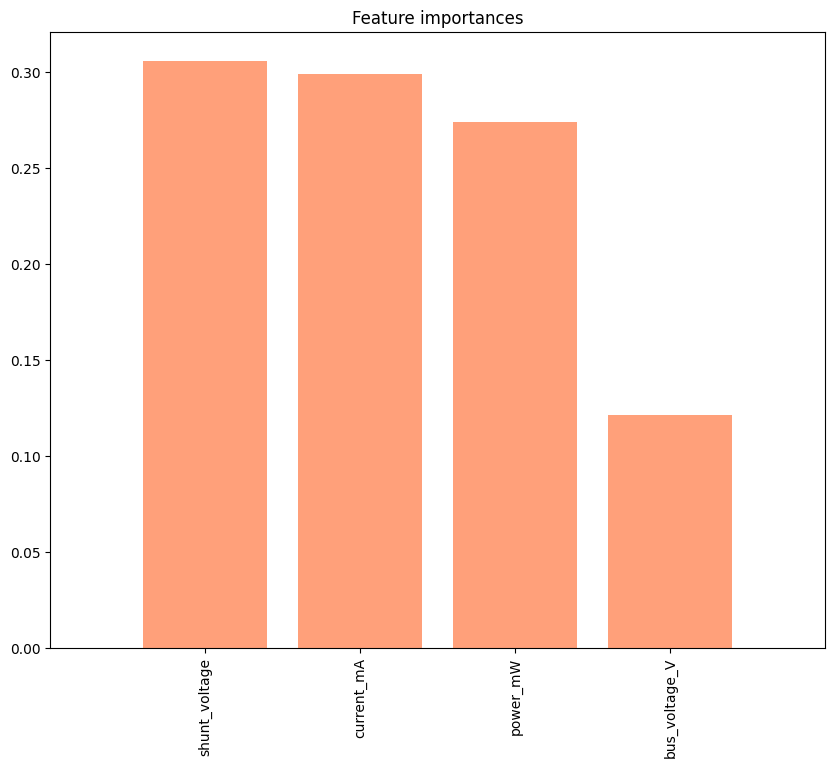

In [9]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import ExtraTreesClassifier

# et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# et.fit(data.drop('marker', axis=1), data['marker'].tolist())
# importances = et.feature_importances_
# indices = np.argsort(importances)[::-1]
# plt.figure(figsize=(75,50))
# plt.title("Feature importances")
# plt.bar(range(data.drop('marker', axis=1).shape[1]), importances[indices],
#         color="lightsalmon", align="center")
# plt.xticks(range(data.drop('marker', axis=1).shape[1]), data.drop('marker', axis=1).columns[indices], rotation=90)
# plt.xlim([-1, data.drop('marker', axis=1).shape[1]])
# plt.show()


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(data.drop('Label', axis=1), data['Label'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(data.drop('Label', axis=1).shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(data.drop('Label', axis=1).shape[1]), data.drop('Label', axis=1).columns[indices], rotation=90)
plt.xlim([-1, data.drop('Label', axis=1).shape[1]])
plt.show()

In [10]:
data

,shunt_voltage,bus_voltage_V,current_mA,power_mW,Label
0,978,5.165,1027,5300,attack
1,872,5.161,1009,4980,attack
2,1017,5.165,1029,5300,attack
3,930,5.161,1005,5180,attack
4,958,5.165,1034,5180,attack
...,...,...,...,...,...
115293,484,5.201,487,2500,attack
115294,477,5.197,567,2860,attack
115295,510,5.197,509,2660,attack
115296,477,5.201,477,2500,attack


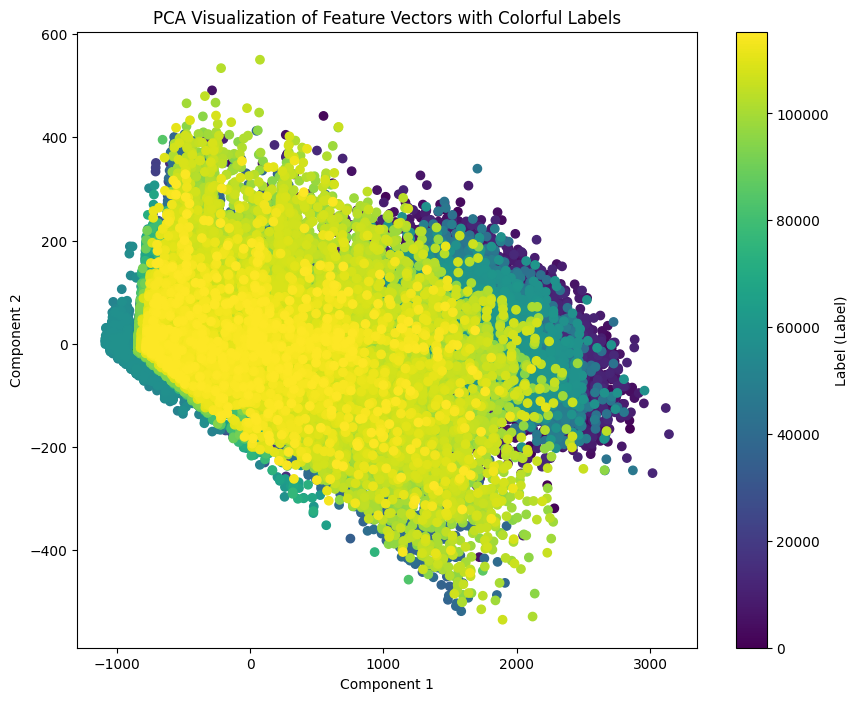

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('Label', axis=1)  # Features
labels = data['Label']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])
# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,115298), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Label)')
plt.show()


Explained Variance Ratio: [0.99283328 0.00537076 0.00179596]


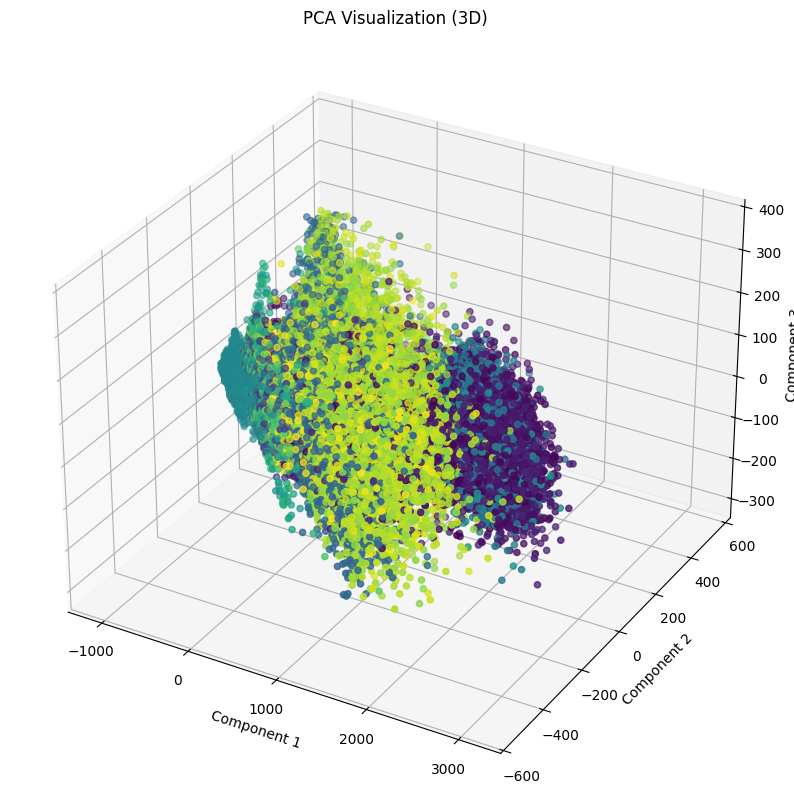

In [12]:
# Assuming 'df' contains your data
features1 = data.drop('Label', axis=1)  # Features
label = data['Label']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,115298), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [13]:
et = ExtraTreesClassifier(n_estimators = 100, random_state=42, n_jobs=-1)

# sfm = SelectFromModel(rf, threshold=0.00025)
sfm = SelectFromModel(et)
sfm.fit(data.drop('Label', axis=1), data['Label'].tolist())
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

feature_vector_1 = sfm.transform(data.drop('Label', axis=1))

# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))
print(feature_vector_1.shape)




(115298, 3)


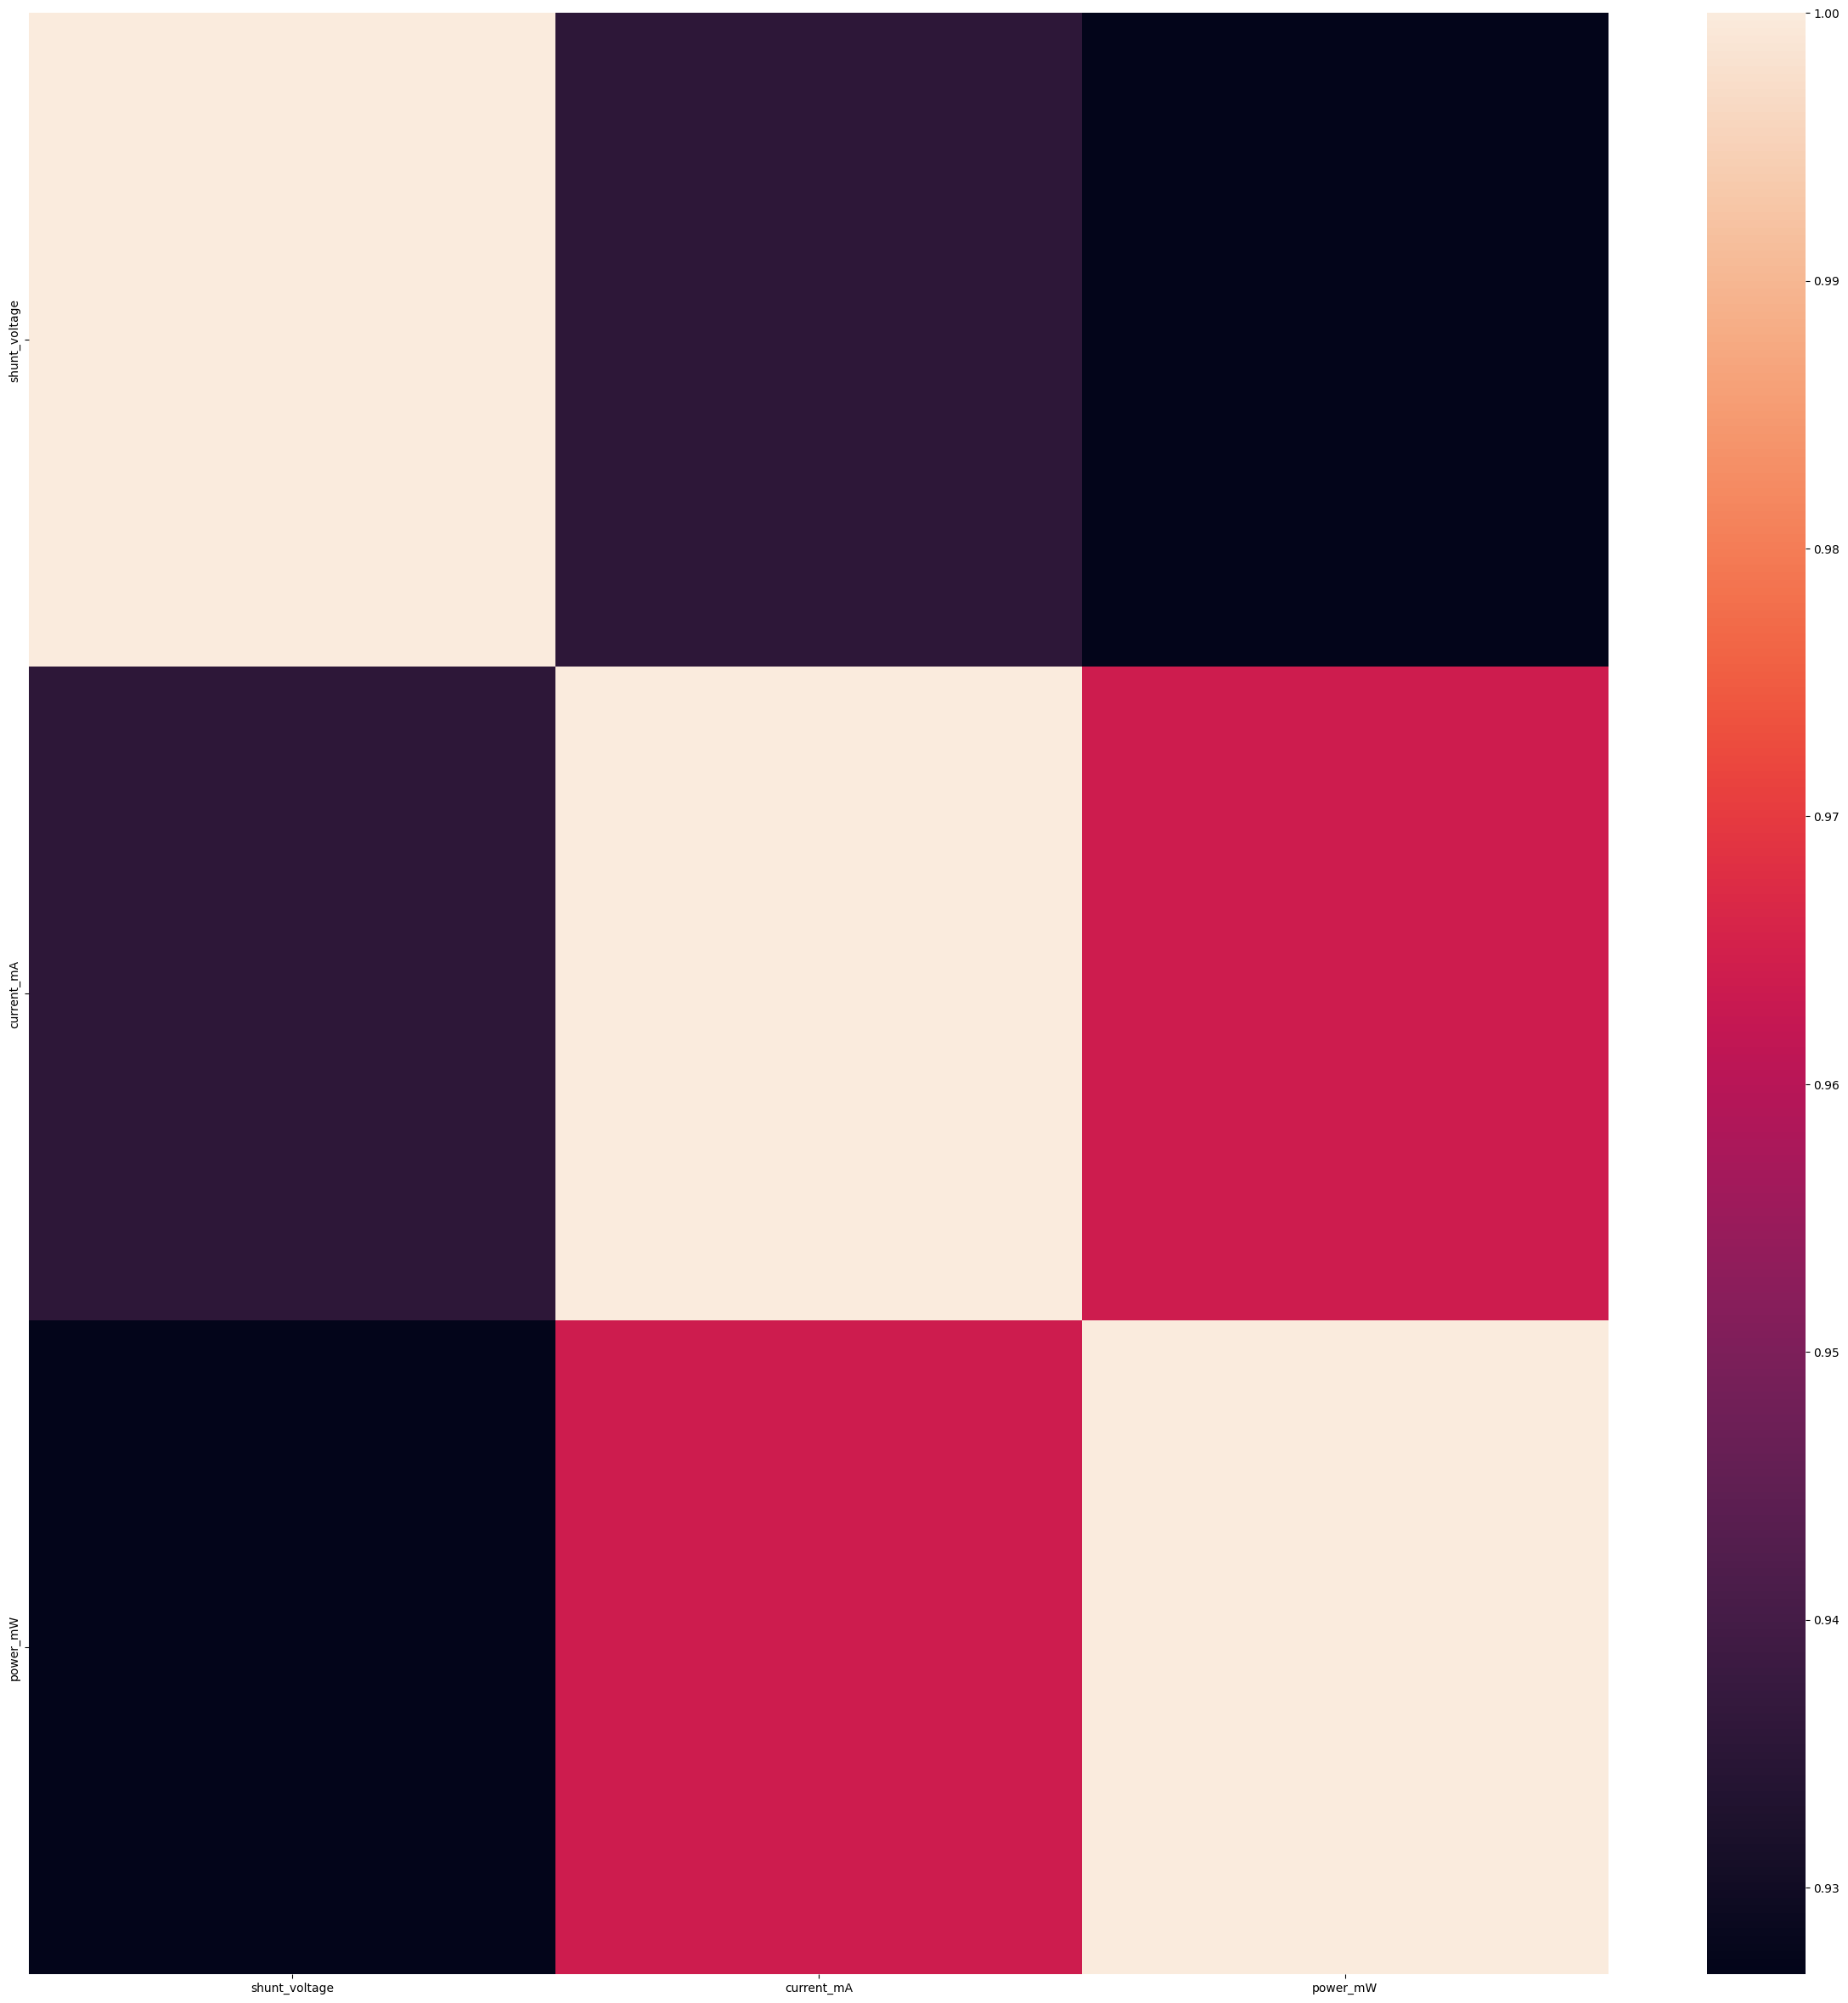

In [14]:
cols = sfm.get_feature_names_out()
feature_vector_1 =pd.DataFrame(feature_vector_1)
feature_vector_1.columns = cols
feature_vector_1



corr = pd.DataFrame(feature_vector_1).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

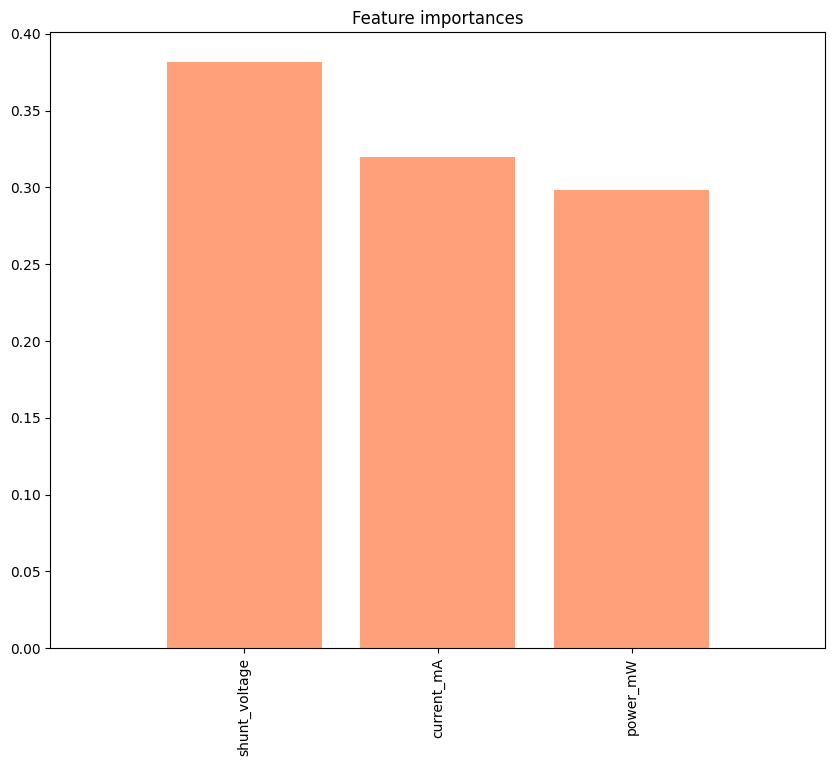

In [15]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(feature_vector_1, data['Label'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(feature_vector_1.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(feature_vector_1.shape[1]), feature_vector_1.columns[indices], rotation=90)
plt.xlim([-1, feature_vector_1.shape[1]])
plt.show()

In [16]:
numerical_cols = feature_vector_1.select_dtypes(include=['float64', 'int64']).columns


scaler = RobustScaler()

# Normalize the numerical columns
feature_vector_1[numerical_cols] = scaler.fit_transform(feature_vector_1[numerical_cols])
feature_vector_1
# # Display the normalized DataFrame
# print(data)


,shunt_voltage,current_mA,power_mW
0,1.677419,1.846429,1.833333
1,1.297491,1.782143,1.611111
2,1.817204,1.853571,1.833333
3,1.505376,1.767857,1.750000
4,1.605735,1.871429,1.750000
...,...,...,...
115293,-0.093190,-0.082143,-0.111111
115294,-0.118280,0.203571,0.138889
115295,0.000000,-0.003571,0.000000
115296,-0.118280,-0.117857,-0.111111


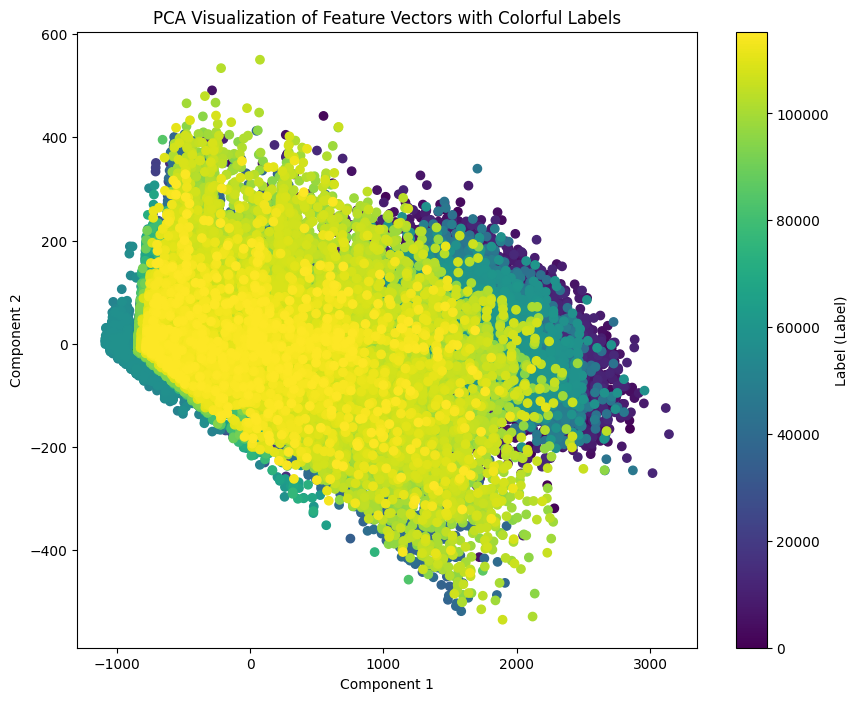

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('Label', axis=1)  # Features
labels = data['Label']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,115298), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Label)')
plt.show()


Explained Variance Ratio: [0.99283328 0.00537076 0.00179596]


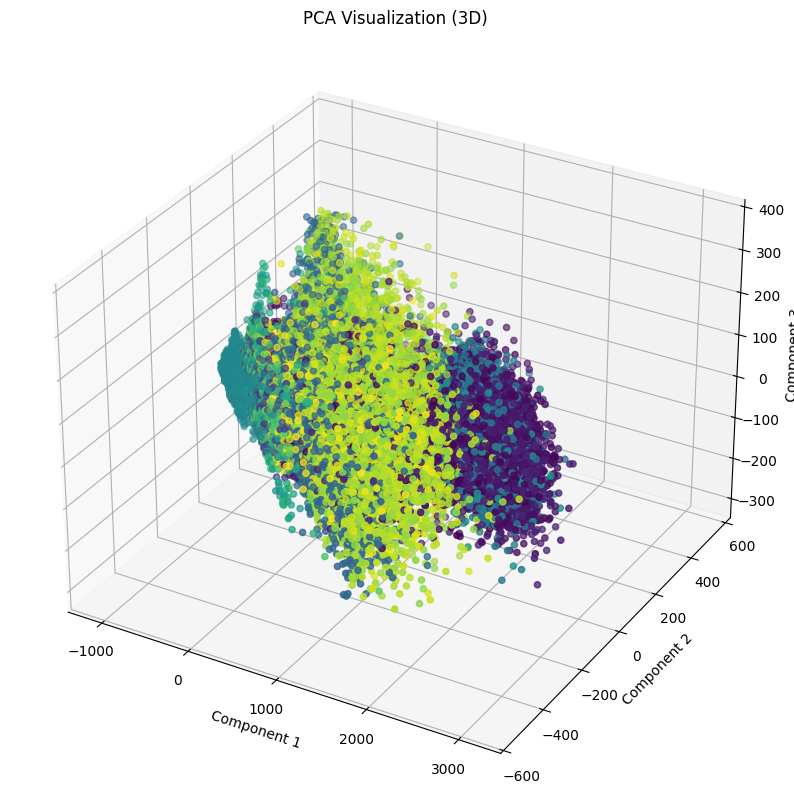

In [18]:
# Assuming 'df' contains your data
features1 = data.drop('Label', axis=1)  # Features
label = data['Label']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,115298), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [19]:
# Assuming the target variable is in a column named 'target'
# X = data.drop('marker', axis=1)
X = feature_vector_1
y = data['Label']
# y.value_counts()
# #import LabelEncoder
# #le = LabelEncoder()
# #y_encoded = le.fit_transform(y)

In [20]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /home/danish/anaconda3/envs/H2o/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn5qe1784
  JVM stdout: /tmp/tmpn5qe1784/h2o_danish_started_from_python.out
  JVM stderr: /tmp/tmpn5qe1784/h2o_danish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Riyadh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,"21 days, 5 hours and 33 minutes"
H2O_cluster_name:,H2O_from_python_danish_4nupnb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,128
H2O_cluster_allowed_cores:,128
H2O_cluster_status:,"locked, healthy"


In [21]:

# Assuming 'X' is your H2OFrame feature matrix and 'y' is your H2OFrame target variable
# Replace 'attacks' and 'neutral' with the actual class labels in your dataset
# Note: Convert your pandas DataFrame to H2OFrame using h2o.H2OFrame() if needed

# Combine features and target into a single H2OFrame
data = h2o.H2OFrame(pd.concat([X, y], axis=1))
data


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


shunt_voltage,current_mA,power_mW,Label
1.67742,1.84643,1.83333,attack
1.29749,1.78214,1.61111,attack
1.8172,1.85357,1.83333,attack
1.50538,1.76786,1.75,attack
1.60573,1.87143,1.75,attack
1.5233,1.85357,1.83333,attack
1.56989,1.53214,1.83333,attack
1.6129,1.51786,1.90278,attack
1.49821,1.45,1.56944,attack
1.19713,1.31786,1.29167,attack


In [22]:

# Identify predictor and response variables
predictors = X.columns.tolist()
response = 'Label'  # Replace with the actual name of your target column


In [23]:

# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8], seed=42)
train.shape

(92190, 4)

In [24]:

# Initialize and train AutoML
aml = H2OAutoML(max_models=50, seed=42, preprocessing=None)
aml.train(x=predictors, y=response, training_frame=train)

# Get the best model from AutoML
best_model = aml.leader


# Save the best model to disk
model_path = '/home/danish/Codes/AutoML/H2o_EVSE-B'
h2o.save_model(model=best_model, path=model_path, force=True)



# Load the saved model 
# best_model = h2o.load_model('/home/danish/Codes/AutoML/H2o/ICS_Dataset_1_With_Feature_Eng/StackedEnsemble_AllModels_1_AutoML_8_20240513_165602')



AutoML progress: |███████████████████████████████████████████████████████████████

In [ ]:
best_model

# Make predictions on the test set
# predictions = best_model.predict(test)


In [ ]:
best_model.explain(test)

In [ ]:

# Optionally, you can evaluate the performance
test_metrics = best_model.model_performance(test)
print(test_metrics)


In [ ]:
best_model.learning_curve_plot()

In [ ]:
predictions = best_model.predict(test)

y_true = test['Label']
y_pred = predictions['predict']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train['Label'].as_data_frame())
y_true_ = label_binarizer.transform(test['Label'].as_data_frame())
y_pred_ = label_binarizer.transform(y_pred.as_data_frame())


print(y_true_.shape)
print(y_pred_.shape)# (n_samples, n_classes)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_true_ = le.fit_transform(y_true_)
# y_pred_ = le.fit_transform(y_pred_)


# print(y_true_)
# print(y_pred_)

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

# Example data
classes=np.unique(train['Label'].as_data_frame())



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true_, y_pred_)

# Normalize confusion matrix
cnf_matrix_norm = normalize(cnf_matrix, axis=1, norm='l1')

# Plot confusion matrix with percentages
plt.figure(figsize=(30, 24))
sns.heatmap(cnf_matrix_norm, annot=True, cmap='Reds', fmt='.1%', xticklabels=classes, yticklabels=classes)
plt.title('Normalized Confusion Matrix with Percentages')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Compute classification report
class_report = classification_report(y_true_, y_pred_)
print("Classification Report:")
print(class_report)


In [ ]:
# # Save the best model to disk
# model_path = '/home/danish/Codes/AutoML/H2o/ICS_Dataset_1_With_Feature_Eng'
# h2o.save_model(model=best_model, path=model_path, force=True)




# # Load the saved model 
# best_model = h2o.load_model('/home/danish/Codes/AutoML/H2o/StackedEnsemble_AllModels_1_AutoML_8_20240512_120210')

In [ ]:
from pycm import ConfusionMatrix

y_true = y_true['Label'].as_data_frame()
y_true = y_true['Label'].tolist()

y_pred = y_pred['predict'].as_data_frame()
y_pred = y_pred['predict'].tolist()


# Calculate and print PyCM metrics
pycm_obj = ConfusionMatrix(actual_vector=y_true, predict_vector=y_pred)
print(pycm_obj)

# Get detailed PyCM report
pycm_report = pycm_obj.overall_stat
print(pycm_report)